# Lego Detection Model

## Imports

In [301]:
from scripts.model import *

## Model Execution on an Image

### Getting Lego Count

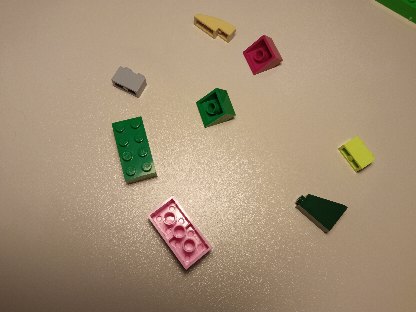

In [302]:
# Load the image
img_id = 11
og_img = loadImage(img_id)
render(og_img)

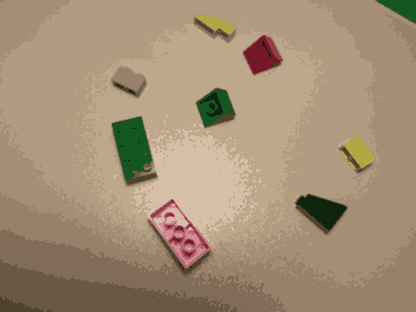

In [303]:
# Use Gaussian Blur & K-means clustering to segment the image into less colors
segmented_img = kmeansBlur(og_img, 3, 15)
render(segmented_img)

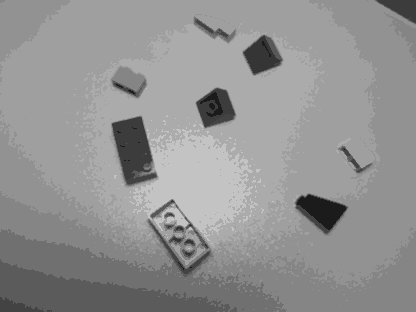

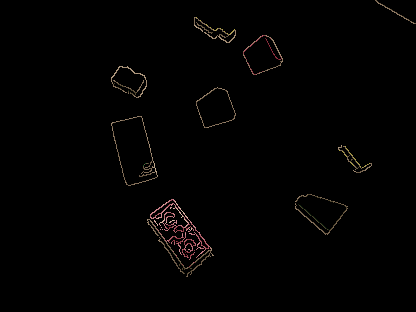

In [304]:
# Fid the edges of the image using Canny edge detection
edges, edge_img = getEdges(segmented_img, 100, 200, True)
render(edge_img)

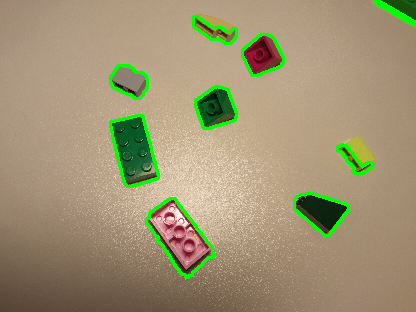

In [305]:
# Get the contours of the edges in the image and connect them if they are close
contour_image, contours = getContours(og_img, edges, 3)
render(contour_image)

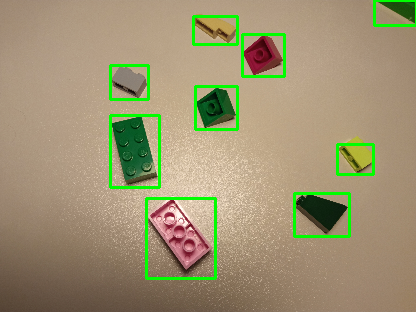

Number of legos found: 9
Guessed correct number!


In [306]:
# Draw bounding boxes around the legos using the contours
num_legos, bounding_box_image, boxes = getBoundingBoxes(og_img, contours, 200, 0.25)
render(bounding_box_image)
print(f"Number of legos found: {num_legos}")

# Evaluate the results of lego counting
_ = guessPieceCount(img_id, num_legos, True)

### Applying Model on Image to Get Lego Count

Errors for image 13: 2


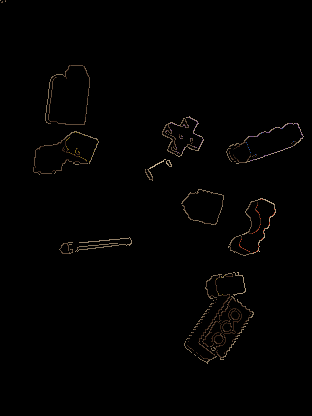

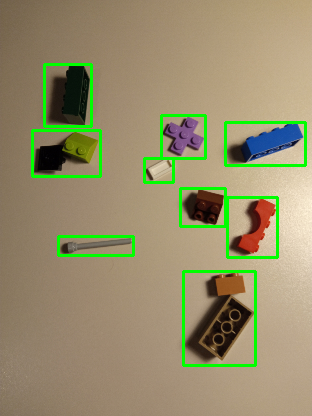

Errors for image 16: 2


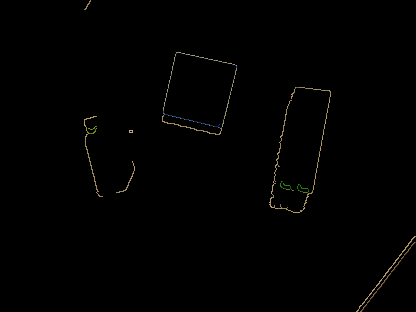

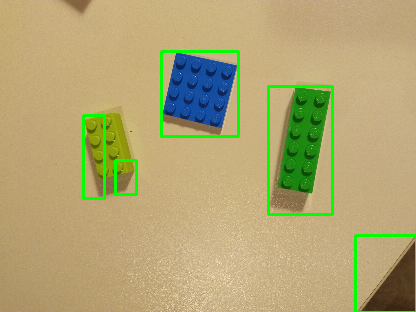

Errors for image 18: 1


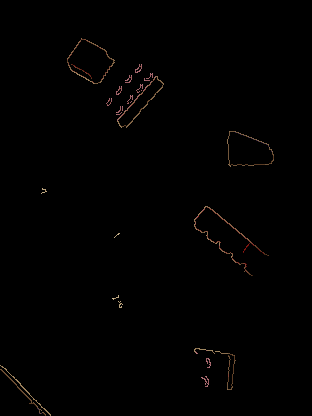

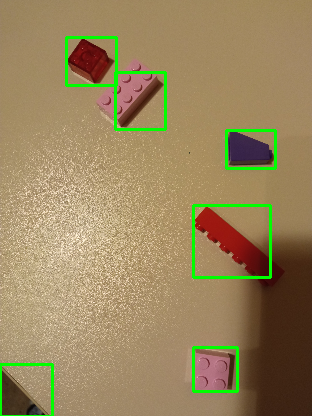

Errors for image 19: 7


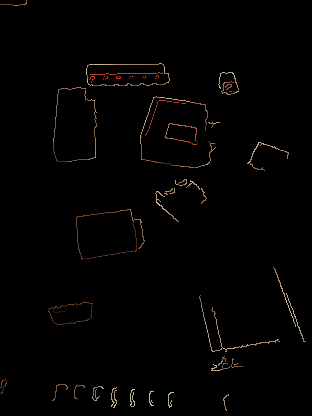

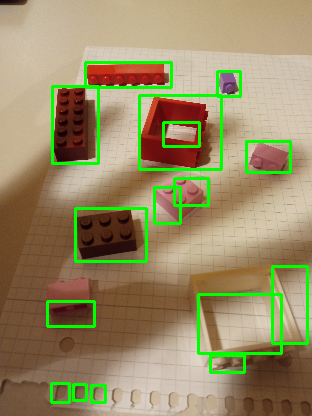

Errors for image 21: 3


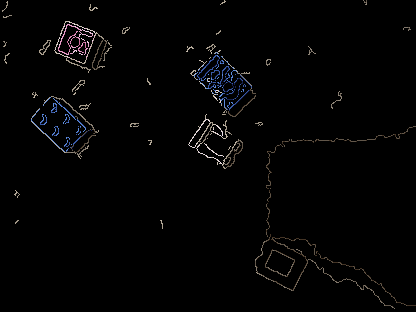

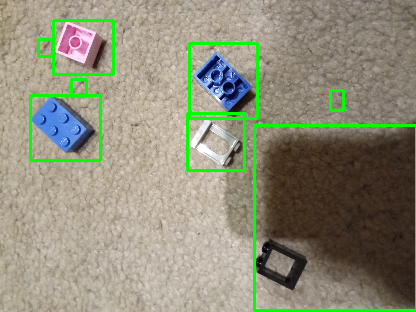

Errors for image 22: 4


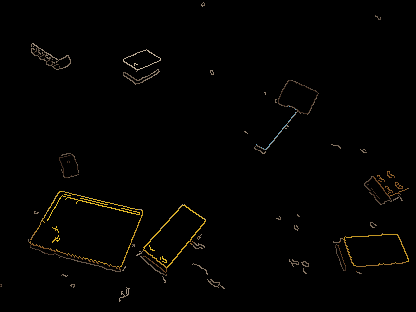

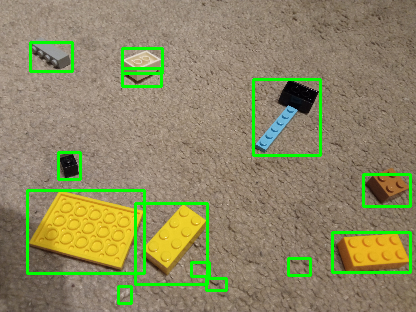

Errors for image 23: 1


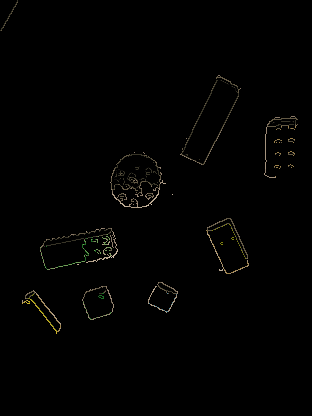

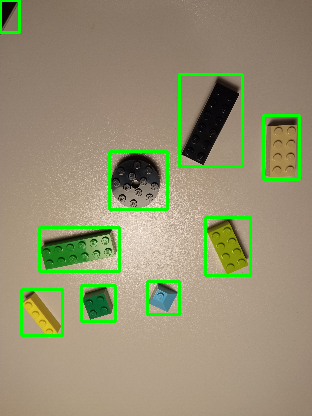

Errors for image 24: 1


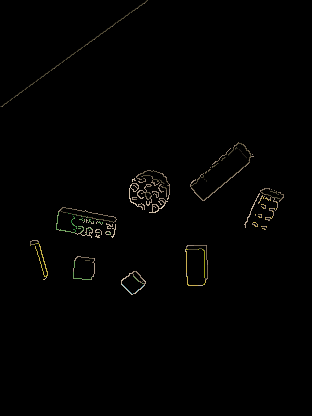

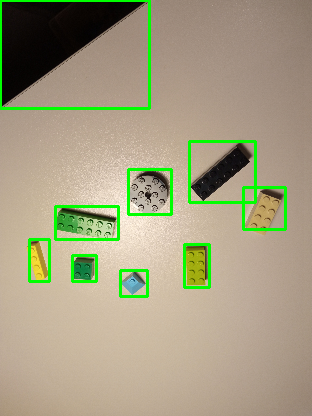

Errors for image 27: 2


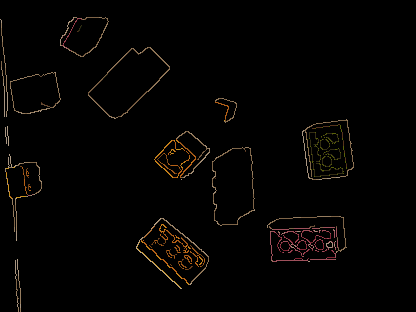

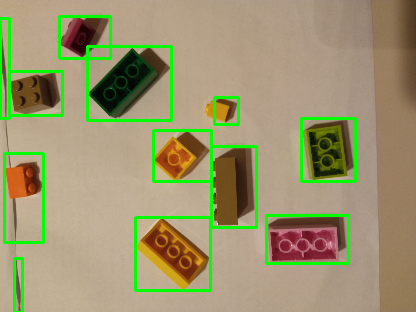

Errors for image 28: 1


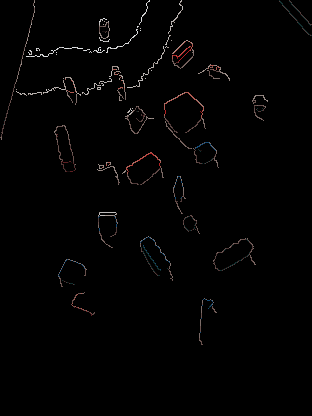

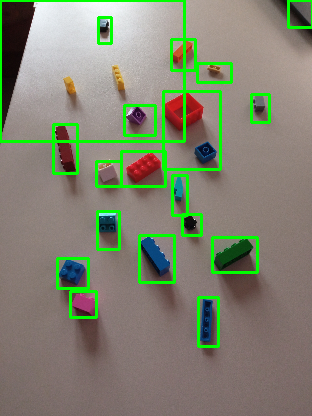

Errors for image 33: 1


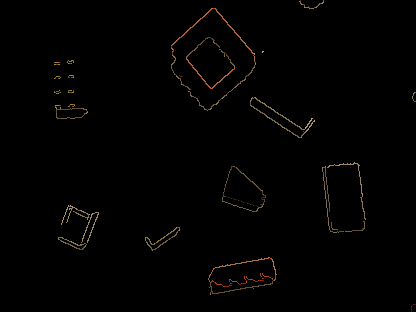

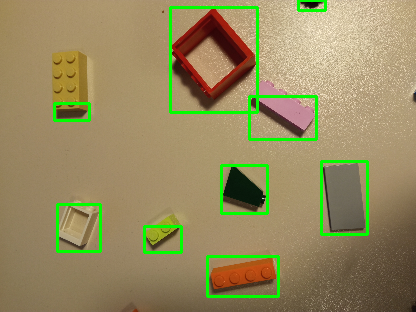

Errors for image 35: 2


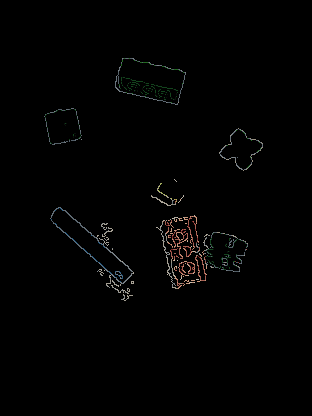

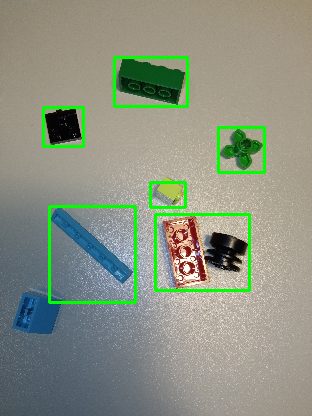

Errors for image 36: 1


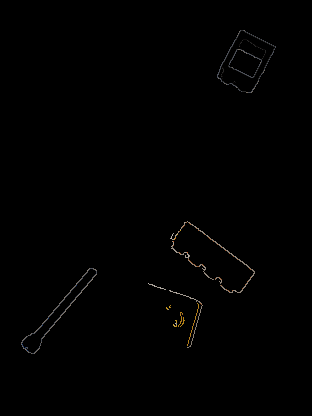

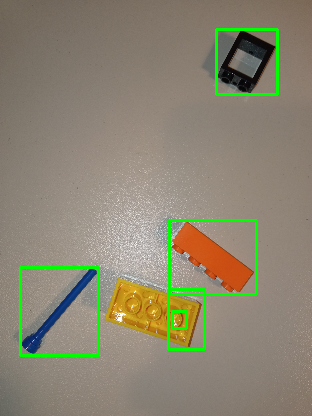

Errors for image 37: 25


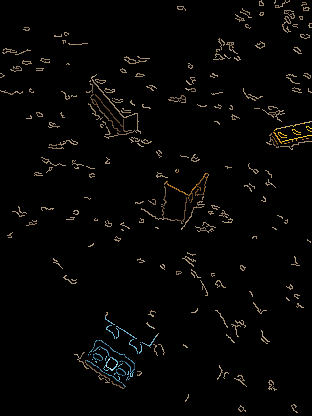

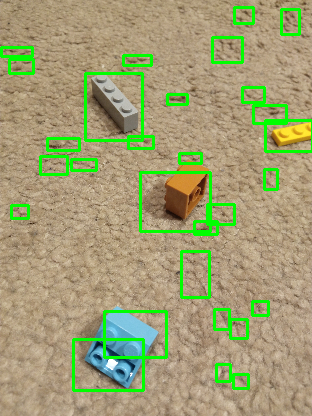

Errors for image 38: 1


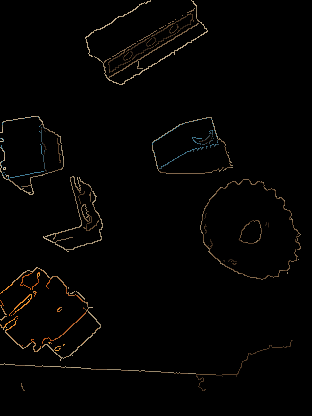

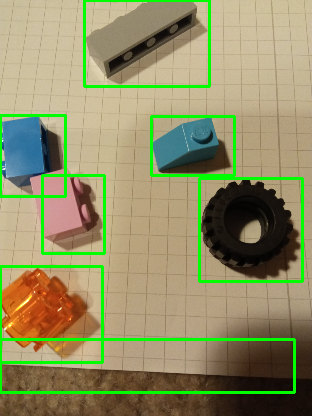

Errors for image 39: 4


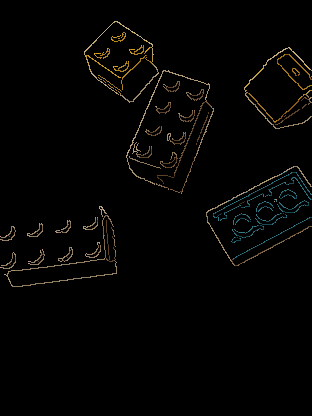

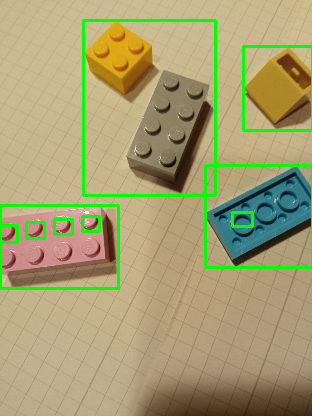

Errors for image 40: 4


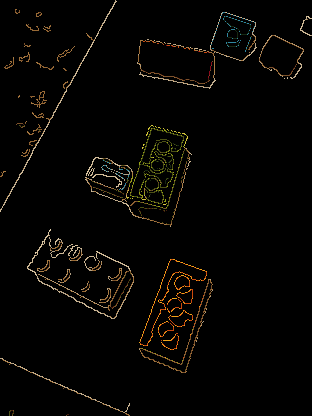

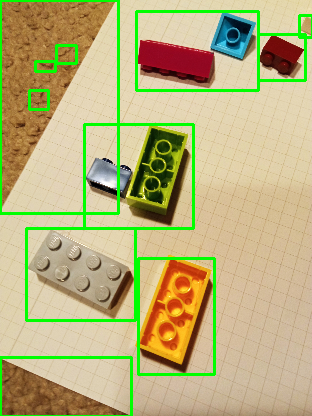

Errors for image 41: 1


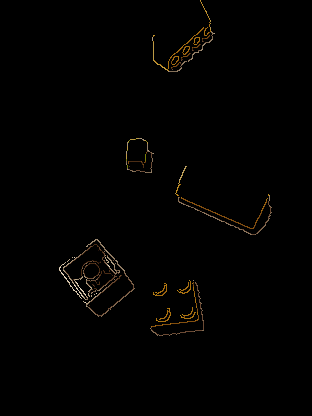

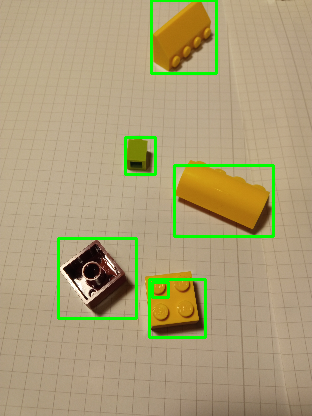

Errors for image 47: 1


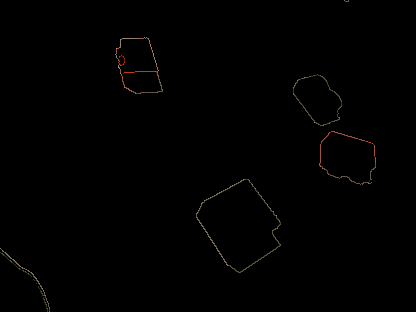

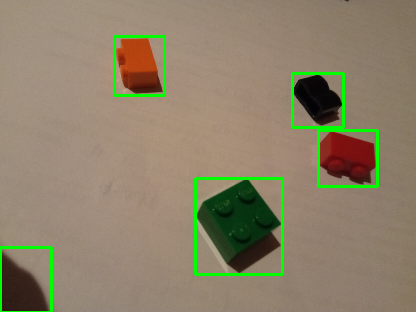

Errors for image 48: 1


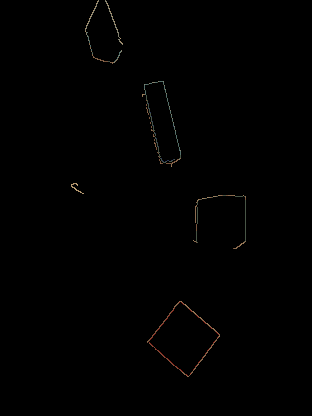

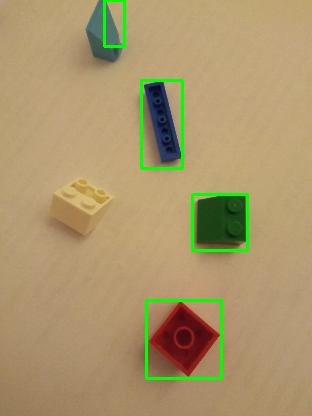

Errors for image 49: 1


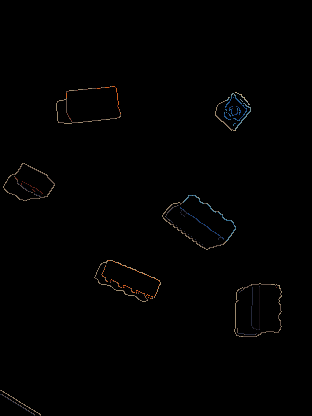

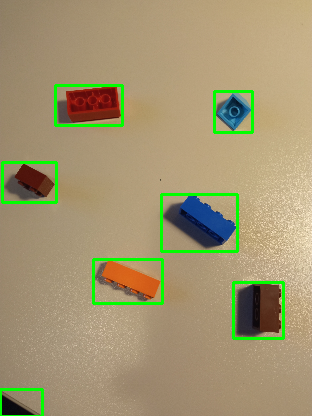

Total errors: 66 / 303
Accuracy: 78.22%


In [307]:
# Check for all images, how many errors are made with the model
total_errors = 0
piece_count = 0
for i in range(1, 50):
    errors, numPieces, edge_img, bounding_box_image = model(i)
    total_errors += errors
    piece_count += numPieces
    if(errors > 0):
        print(f"Errors for image {i}: {errors}")
        render(edge_img)
        render(bounding_box_image)
        
print(f"Total errors: {total_errors} / {piece_count}")
print(f"Accuracy: {round(100 - total_errors / piece_count * 100, 2)}%")

### Getting Lego's Colors

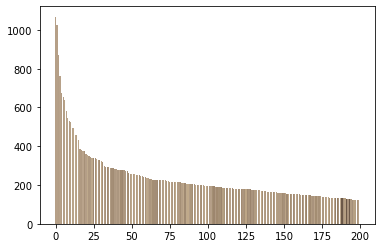

In [308]:
# Getting the most common colors gets us the background colors
# which we can use to remove the background from the bounding boxes
most_common_colors = getMainColors(og_img, 5, 200, True)

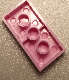

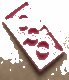

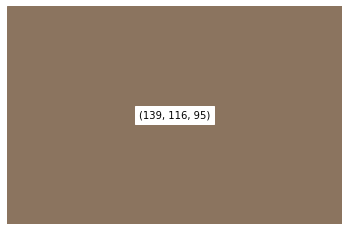

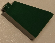

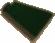

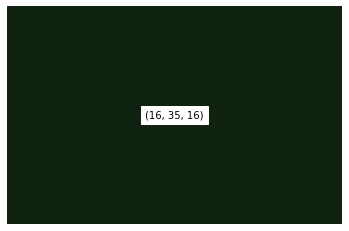

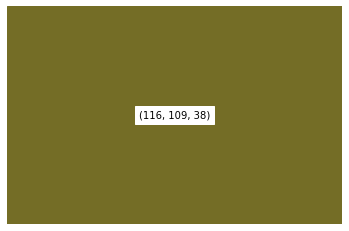

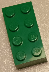

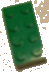

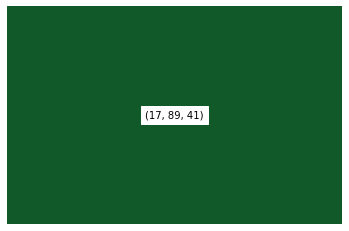

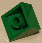

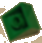

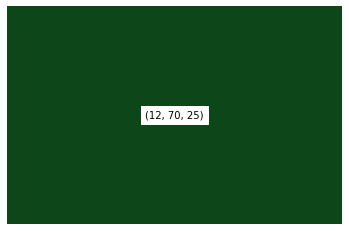

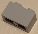

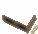

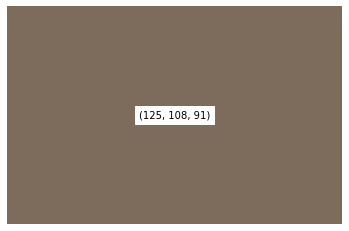

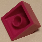

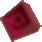

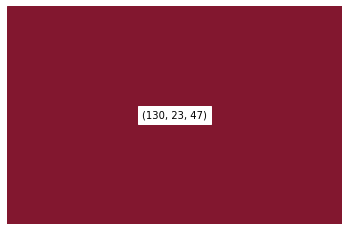

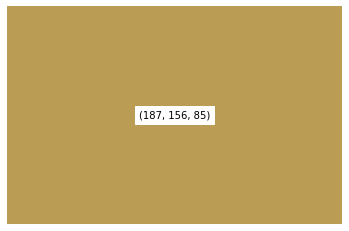

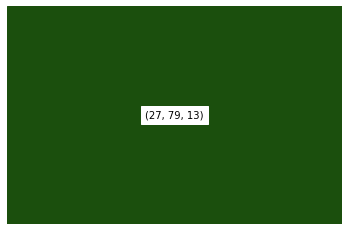

In [310]:
for box in boxes:
    # Extract the bounding box image from the original image
    lego_img = getBoundingBoxImage(og_img, box)
    
    render(lego_img)
    
    # Remove the background colors from the bounding box image
    lego_img = remove_similar_colors(lego_img, most_common_colors, 5, 150)
    
    # Get the most common color in the bounding box image, which should be the color of the lego
    color = getLegoColor(lego_img)
    
    # Display the lego image without the background and the lego color
    render(lego_img)
    display_color_square(color)